In [ ]:
# Author : Mehdi Ammi, Univ. Paris 8

# TensorFlow: Loading Data

This notebook offers an in-depth exploration of handling and analyzing both time series and image data using TensorFlow. It starts with fundamental operations like loading and preprocessing data, demonstrated with the Sunspots and CIFAR-10 datasets. Students learn to visualize data, calculate basic statistics, and perform data augmentation to enhance model training. Advanced techniques include seasonal decomposition of time series data, creating synthetic features, and handling missing values. The course also covers image data processing, teaching normalization, and visualization techniques, along with class distribution analysis. Exercises throughout the course encourage practical engagement by having students apply techniques like creating windowed datasets and calculating image similarities. This comprehensive course is designed to equip learners with robust skills in data handling and preprocessing for machine learning applications using TensorFlow, ensuring they can manage diverse datasets effectively for real-world projects.

## Loading Time Series Data in TensorFlow

Below is an example of how to load and display time series data in TensorFlow, using the Sunspots dataset.

### Importing Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Loading and preprocessing the sunspots dataset

We will download the Sunspots dataset from a URL and preprocess it.

In [ ]:
# Load Sunspots dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/Sunspots.csv"
data = np.genfromtxt(dataset_url, delimiter=',', skip_header=1)

time = data[:, 0]
sunspots = data[:, 2]

### Visualizing the Full Dataset

Let's visualize the entire time series to understand its pattern.

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(time, sunspots)
plt.xlabel("Time")
plt.ylabel("Monthly Sunspots")
plt.title("Sunspots over Time")
plt.show()

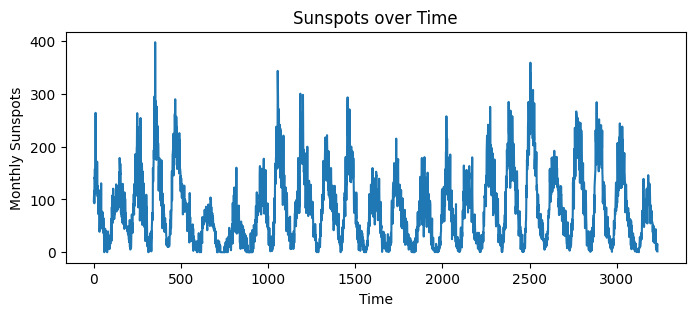

### Splitting the Data into Training and Test Sets

We will split the dataset into training and test sets.

In [ ]:
split_time = 3000
time_train = time[:split_time]
sunspots_train = sunspots[:split_time]
time_test = time[split_time:]
sunspots_test = sunspots[split_time:]

### Visualizing the Training Data

Let's visualize the training data.

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(time_train, sunspots_train)
plt.xlabel("Time")
plt.ylabel("Monthly Sunspots")
plt.title("Training Data - Sunspots over Time")
plt.show()

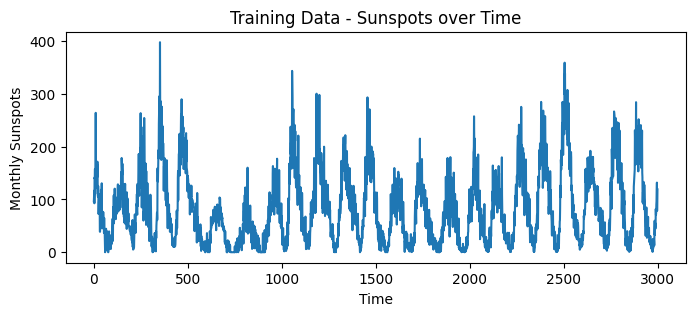

### Visualizing the Test Data

Similarly, let's visualize the test data.

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(time_test, sunspots_test)
plt.xlabel("Time")
plt.ylabel("Monthly Sunspots")
plt.title("Test Data - Sunspots over Time")
plt.show()

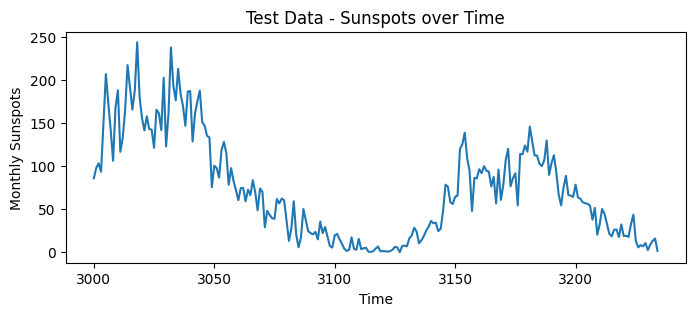

### Exercices 

### Exercice 1: Calculate Basic Statistics

Calculate and print basic statistics (mean, median, standard deviation) for both the training and test datasets.

In [ ]:
# Calculate statistics for training data
mean_train = np.mean(sunspots_train)
median_train = np.median(sunspots_train)
std_train = np.std(sunspots_train)

print("Training Data Statistics:")
print(f"Mean: {mean_train}")
print(f"Median: {median_train}")
print(f"Standard Deviation: {std_train}")

# Calculate statistics for test data
mean_test = np.mean(sunspots_test)
median_test = np.median(sunspots_test)
std_test = np.std(sunspots_test)

print("\nTest Data Statistics:")
print(f"Mean: {mean_test}")
print(f"Median: {median_test}")
print(f"Standard Deviation: {std_test}")

Additional Questions:

1. Modify the code to calculate and print the range (max - min) for both the training and test datasets.
2. Add code to calculate and print the variance for both the training and test datasets.
3. Modify the code to plot histograms for the training and test datasets to visualize their distributions.


### Exercice 2: Create a Windowed Dataset

Create a function that generates a windowed dataset for a given window size.

In [ ]:
def create_windowed_dataset(series, window_size):
    dataset = []
    labels = []
    for i in range(len(series) - window_size):
        dataset.append(series[i:i + window_size])
        labels.append(series[i + window_size])
    return np.array(dataset), np.array(labels)

# Example usage
window_size = 60
X_train, y_train = create_windowed_dataset(sunspots_train, window_size)
X_test, y_test = create_windowed_dataset(sunspots_test, window_size)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Additional Questions:

1. Modify the function to include the time index as an additional feature in each window.
2. Add code to create a validation set from the training data (e.g., using the last 20% of the training data as validation data).
3. Modify the function to return overlapping windows of size window_size but with a specified stride.

### Exercice 3: Plot Moving Average

Plot the moving average of the sunspots data to observe the trend.

In [ ]:
def moving_average(series, window_size):
    return np.convolve(series, np.ones(window_size) / window_size, mode='valid')

# Plot moving average for the full dataset
moving_avg = moving_average(sunspots, window_size=60)

plt.figure(figsize=(10, 6))
plt.plot(time[len(time) - len(moving_avg):], moving_avg, label='Moving Average')
plt.plot(time, sunspots, label='Original Data', alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Monthly Sunspots")
plt.title("Sunspots with Moving Average")
plt.legend()
plt.show()

Additional Questions:

1. Modify the code to plot moving averages with different window sizes (e.g., 30, 60, 90) on the same plot for comparison.
2. Add code to plot the moving average for the training and test sets separately.
3. Modify the code to calculate and plot the exponentially weighted moving average (EWMA) instead of the simple moving average.

### Exercice 4: Detect and Handle Missing Values

Check for missing values in the dataset and handle them appropriately.

In [ ]:
# Check for missing values
missing_values = np.isnan(sunspots).sum()
print(f"Number of missing values in the dataset: {missing_values}")

# Handling missing values (e.g., using forward fill)
if missing_values > 0:
    sunspots = np.nan_to_num(sunspots, nan=np.nanmean(sunspots))

# Verify no missing values remain
missing_values_after = np.isnan(sunspots).sum()
print(f"Number of missing values after handling: {missing_values_after}")

Additional Questions:

1. Modify the code to handle missing values using linear interpolation instead of forward fill.
2. Add code to visualize the locations of missing values in the dataset before and after handling them.
3. Modify the code to remove any data points with missing values instead of imputing them.

### Exercice 5: Perform Seasonal Decomposition

Decompose the time series data into trend, seasonal, and residual components.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(sunspots, model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(time, sunspots, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(time, result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(time, result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(time, result.resid, label='Residual')
plt.legend(loc='upper left')

plt.show()

Additional Questions:

1. Modify the code to perform multiplicative decomposition instead of additive decomposition.
2. Add code to plot only the seasonal component for both the training and test sets.
3. Modify the code to save the decomposed components (trend, seasonal, residual) to separate files.

### Exercice 6: Create Synthetic Features

Create additional synthetic features from the original time series, such as the rolling mean and rolling standard deviation.

In [ ]:
window_size = 60

# Create rolling mean and standard deviation
rolling_mean = np.convolve(sunspots, np.ones(window_size)/window_size, mode='valid')
rolling_std = np.std([sunspots[i:i+window_size] for i in range(len(sunspots)-window_size+1)], axis=1)

# Plot original data and synthetic features
plt.figure(figsize=(12, 6))
plt.plot(time, sunspots, label='Original Data')
plt.plot(time[window_size-1:], rolling_mean, label='Rolling Mean')
plt.plot(time[window_size-1:], rolling_std, label='Rolling Std Dev')
plt.xlabel("Time")
plt.ylabel("Monthly Sunspots")
plt.title("Sunspots with Synthetic Features")
plt.legend()
plt.show()

Additional Questions:

1. Modify the code to create and plot additional synthetic features such as the rolling median and rolling variance.
2. Add code to create lagged features (e.g., sunspots at t-1, t-2, etc.) and plot them.
3. Modify the code to combine multiple synthetic features into a single dataset suitable for machine learning.

## Loading Image Data in TensorFlow

Below is an example of how to load and display images data in TensorFlow, using the CIFAR-10 Dataset

### Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

### Loading the CIFAR-10 Dataset

The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Normalizing the Data

It's a good practice to normalize the pixel values to the range [0, 1].

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

### Displaying Some Training Images

Let's display the first 10 images from the training set along with their labels.

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

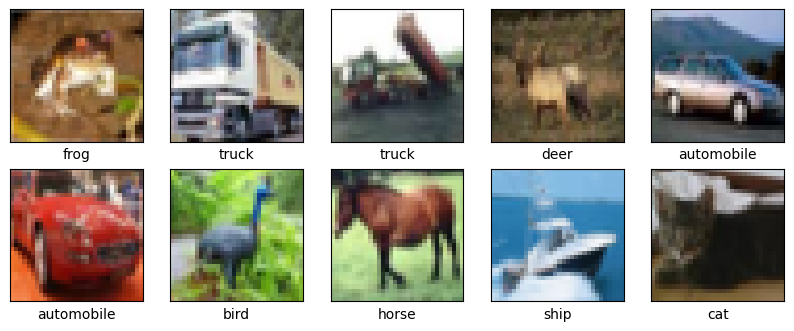

### Displaying Some Test Images

Similarly, let's display the first 10 images from the test set along with their labels.

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_test[i][0]])
plt.show()

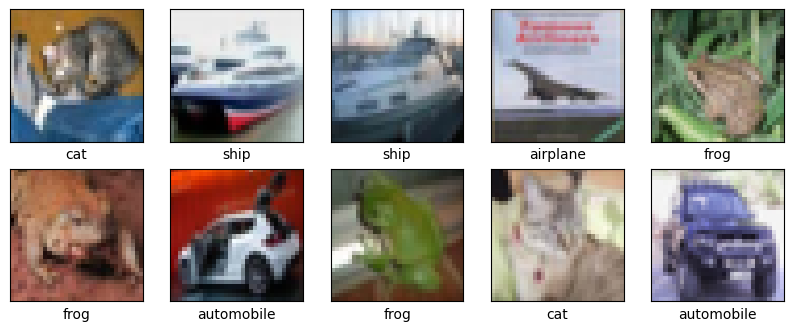

### Exercices 

### Exercice 1: Calculate and Display Image Statistics

Calculate and display basic statistics (mean, standard deviation) for each channel (RGB) of the training and test datasets.

In [ ]:
# Calculate mean and standard deviation for each channel in the training set
mean_train = x_train.mean(axis=(0, 1, 2))
std_train = x_train.std(axis=(0, 1, 2))

print(f"Training Data Mean (R, G, B): {mean_train}")
print(f"Training Data Std Dev (R, G, B): {std_train}")

# Calculate mean and standard deviation for each channel in the test set
mean_test = x_test.mean(axis=(0, 1, 2))
std_test = x_test.std(axis=(0, 1, 2))

print(f"Test Data Mean (R, G, B): {mean_test}")
print(f"Test Data Std Dev (R, G, B): {std_test}")


Additional Questions:

1. Modify the code to calculate and print the minimum and maximum pixel values for each channel in the training and test datasets.
2. Add code to plot histograms of the pixel values for each channel in the training dataset.
3. Modify the code to normalize each channel of the images to have a mean of 0 and a standard deviation of 1.

### Exercice 2: Data Augmentation

Apply data augmentation (e.g., rotation, flipping) to the training images and visualize the augmented images.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to the training data
datagen.fit(x_train)

# Display some augmented training images
plt.figure(figsize=(10,10))
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=10):
    for i in range(10):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_batch[i])
        plt.xlabel(class_names[y_batch[i][0]])
    break
plt.show()

Additional Questions:

1. Modify the data augmentation parameters to include vertical flipping and visualize the augmented images.
2. Add code to save some of the augmented images to disk.
3. Modify the code to create a custom data augmentation function that includes random brightness and contrast adjustments.

### Exercice 3: Create and Display Class Distribution

Calculate and display the distribution of classes in the training and test datasets.

In [ ]:
import numpy as np

# Calculate class distribution for the training set
train_class_counts = np.bincount(y_train.flatten())
train_class_distribution = train_class_counts / len(y_train)

print("Training Class Distribution:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {train_class_distribution[i]:.2%}")

# Calculate class distribution for the test set
test_class_counts = np.bincount(y_test.flatten())
test_class_distribution = test_class_counts / len(y_test)

print("\nTest Class Distribution:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {test_class_distribution[i]:.2%}")

Additional Questions:

1. Modify the code to plot bar charts of the class distributions for the training and test datasets.
2. Add code to visualize some examples of misclassified images after training a model (you'll need to train a simple model first).
3. Modify the code to handle cases where some classes might be missing in the dataset.

### Exercice 4: Normalize the Data with Custom Statistics

Normalize the training and test datasets using custom mean and standard deviation values.

In [ ]:
# Custom normalization function
def custom_normalize(images, mean, std):
    return (images - mean) / std

# Custom mean and std (for demonstration, using calculated values)
mean_custom = np.array([0.5, 0.5, 0.5])
std_custom = np.array([0.2, 0.2, 0.2])

# Apply custom normalization
x_train_custom_norm = custom_normalize(x_train, mean_custom, std_custom)
x_test_custom_norm = custom_normalize(x_test, mean_custom, std_custom)

# Display some normalized training images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow((x_train_custom_norm[i] * std_custom + mean_custom).astype(np.float32))
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

Additional Questions:

1. Modify the normalization function to handle the case where the standard deviation is zero.
2. Add code to denormalize the images and verify that the original images are recovered.
3. Modify the code to apply different normalization statistics for each class in the dataset.

### Exercice 5: Display Image Grids

Create a function to display a grid of images with their labels.

In [ ]:
def display_image_grid(images, labels, class_names, grid_size=(5, 5)):
    plt.figure(figsize=(10, 10))
    for i in range(grid_size[0] * grid_size[1]):
        plt.subplot(grid_size[0], grid_size[1], i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

# Display a grid of training images
display_image_grid(x_train, y_train, class_names)

# Display a grid of test images
display_image_grid(x_test, y_test, class_names)

Additional Questions:

1. Modify the function to display grayscale images if the input images are in grayscale.
2. Add code to display the image grid with the predicted labels after training a simple model.
3. Modify the function to include an option to display images with bounding boxes or annotations.

### Exercice 6: Compute and Visualize Image Similarity

Compute and visualize the similarity between the first image in the test set and the rest of the images.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity
similarity = cosine_similarity(x_test.reshape(len(x_test), -1))
first_image_similarity = similarity[0]

# Sort images by similarity
sorted_indices = np.argsort(first_image_similarity)[::-1]

# Display the most similar images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[sorted_indices[i]])
    plt.xlabel(f"Sim: {first_image_similarity[sorted_indices[i]]:.2f}")
plt.show()

Additional Questions:

1. Modify the code to use a different similarity metric, such as Euclidean distance.
2. Add code to visualize the least similar images instead of the most similar ones.
3. Modify the code to compute and visualize similarity within the training set and compare it to the test set similarity.

### Exercice 7: Loading and Visualizing other Datasets

Use the previous TensorFlow codes to load the following datasets

1. Time Series

 - Daily Minimum Temperatures dataset, dataset_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
 - Airline Passengers dataset, dataset_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

2. Images : 
 - MNIST Dataset
 - Fashion MNIST 


# Deliverables

Submit the modified code for each exercise.

Provide a brief report on the impact of each modification on model performance. Include accuracy, loss, and any other relevant metrics.